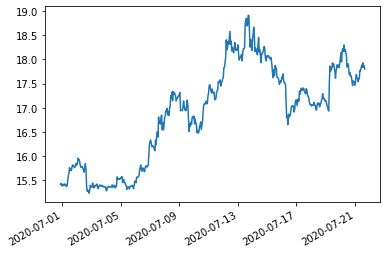

In [3]:
import requests        
import json            
import pandas as pd    
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt     
    
import datetime as dt 

def get_bars(symbol, interval = '1h'):
   root_url = 'https://api.binance.com/api/v1/klines'
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

steemeth = get_bars('BTCUSDT')
ethusdt = get_bars('ETHUSDT')
bnbusdt = get_bars('BNBUSDT')
steemusdt = steemeth['c'].astype('float') 
ethusdt =  ethusdt['c'].astype('float')
bnbusdt =  bnbusdt['c'].astype('float')

bnbusdt.plot()

In [ ]:
!pip install arch

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007514. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:      6,   Neg. LLF: -519.7109283680331
Iteration:      2,   Func. Count:     17,   Neg. LLF: -519.8014034920197
Iteration:      3,   Func. Count:     26,   Neg. LLF: -519.8034892580216
Iteration:      4,   Func. Count:     33,   Neg. LLF: -520.1631697434879
Iteration:      5,   Func. Count:     46,   Neg. LLF: -520.1631725172522
Iteration:      6,   Func. Count:     55,   Neg. LLF: -520.1678151898448
Iteration:      7,   Func. Count:     62,   Neg. LLF: -520.487188591718
Iteration:      8,   Func. Count:     69,   Neg. LLF: -520.5665685082778
Iteration:      9,   Func. Count:     80,   Neg. LLF: -520.7525343723291
Iteration:     10,   Func. Count:     89,   Neg. LLF: -520.7654655430438
Iteration:     11,   Func. Count:     96,   Neg. LLF: -520.9758373242348
Iteration:     12,   Func. Count:    103,   Neg. LLF: -521.2630582998216
Iteration:     13,   Func. Count:    110,   Neg. LLF: -521.4376277391684
Iteration:     14,   Func. Count:    117,   Neg. LLF

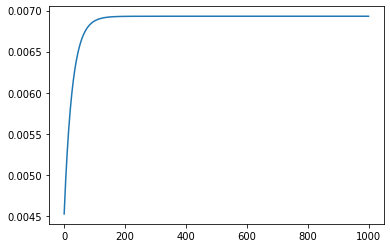

In [ ]:
from arch import arch_model
from matplotlib import pyplot
model = arch_model(np.diff(steemusdt), vol='GARCH', p=1, q=1)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=1000)
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [ ]:
Sigma = yhat.variance.values[-1, :]

In [ ]:
def hNormalVaRES(new,p,x):
  mu = np.mean(x)
  ES = mu + np.sqrt(new)*norm.pdf(norm.ppf(p))/p
  return ES

In [ ]:
def samplebPoE(x,v,p):
  r = min(sum(np.maximum(a*(x-v)+1,0)) for a in range(0,1000))/len(x)
  return (r)

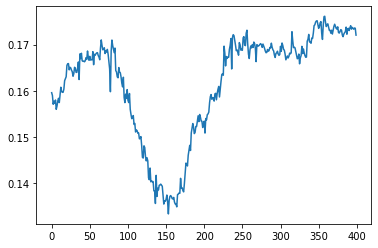

In [ ]:
t = 100
q = 0.05;
ES = 2;
bPoE= 0.1;
r = np.diff(steemusdt)
T= len(r)
alph = 0.3
es = []
bp = []
for J in range(t,T+1):
    r1 = r[J-t+1:J]
    ES = (1-alph)*hNormalVaRES(Sigma[J],q,r1)+alph*hNormalVaRES(Sigma[J],bPoE,r1)
    es.append(ES)
    bPoE = np.maximum(samplebPoE(r1, ES, bPoE),0.001)
    bp.append(bPoE)

plt.plot(es)

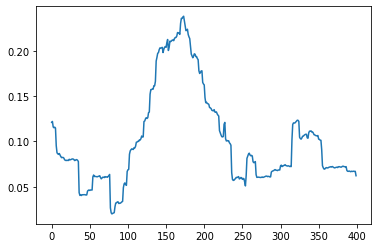

In [ ]:
plt.plot(bp)